# Importing libraries

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import f1_score

from yellowbrick.classifier.rocauc import roc_auc
import joblib


# from lime import lime_text
# from lime.lime_text import LimeTextExplainer
# from lime.lime_text import IndexedString,IndexedCharacters
# from lime.lime_base import LimeBase
# from lime.lime_text import explanation
# sns.set(font_scale=1.3)
# nltk.download('omw-1.4')

# Read cleaned data

In [56]:
x_train=pd.read_csv('x_train.csv').squeeze()
y_train=pd.read_csv('y_train.csv').squeeze()
x_test=pd.read_csv('x_test.csv').squeeze()
y_test=pd.read_csv('y_test.csv').squeeze()

In [57]:
# final_df=pd.read_csv('FinalData.csv')
# label_map = {
#     'sad': 0,
#     'angry': 1,
#     'fear':2,
#     'happy':3,
#     'neutral':4,
#     'disgust':5
# }
# final_df['Emotion'] = final_df['Emotion'].map(label_map)
# x_train,x_test,y_train,y_test=train_test_split(final_df['Text'],final_df['Emotion'],test_size=0.20,shuffle=True,random_state=42)

In [58]:
type(x_test)

pandas.core.series.Series

# Load Model

In [67]:
logreg = joblib.load('saved_models//LogReg.sav')

In [60]:
# logreg = joblib.load('logreg1.sav')

In [61]:
# nb = joblib.load('saved_models//Naive_Bayes.sav')

In [62]:
ran = joblib.load('saved_models//Random_Forest.sav')

In [63]:
svm = joblib.load('saved_models//SVM.sav')

In [65]:
# ensemble = joblib.load('saved_models//ensemble.sav')

# Evaluate models

In [68]:
logreg

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 LogisticRegression(max_iter=800, multi_class='multinomial',
                                    random_state=0))])

In [69]:
def get_F1(trained_model,X,y):
 
    # Make predictions on the input data using the trained model
    predicted=trained_model.predict(X)
    # Calculate the F1 score for the predictions
    f1=f1_score(y,predicted, average=None)
    # Return the F1 score
    return f1

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import tensorflow as tf
import numpy as np
def evaluate(model,x_test,y_test):
    
    y_pred=model.predict(x_test)

    #Accuracy    
    model_accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ', model_accuracy,'\n')
    
    #MSE
    score = mean_squared_error(y_test, y_pred)
    print('Model MSE: ',score)
    
    #MAE
    score = mean_absolute_error(y_test, y_pred)
    print('Model MAE: ',score)
    
    #F1 Score
    f1_Score = get_F1(model, x_test, y_test)
    pd.DataFrame(f1_Score, index=['0','1','2','3','4','5'], columns=['F1 score']) 
    print(classification_report(y_test, y_pred))
    
    
    #Lime explainer
#     explainer_LR = LimeTextExplainer(class_names=['0','1','2','3','4','5'])
    idx  = 205
#     print(x_test)
#     print("Actual Text : ", x_test.tolist()[idx])
#     print("Prediction : ", model.predict(x_test)[idx])
#     print("Actual :     ", y_test.tolist()[idx])
#     exp = explainer_LR.explain_instance(x_test.tolist()[idx], model.predict_proba,top_labels=6)
#     exp.show_in_notebook() 
    

    #Get Probabilities
    sample_prob = model.predict_proba(x_test)[idx]
    print(sample_prob)
    emotions=['sad','angry','fear','happy','neutral','disgust']
    dic={}
    n=0
    for i, val in enumerate(sample_prob):
        dic[emotions[i]] = val
    print(dic)
    
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,index = ['0','1','2','3','4','5'], 
                         columns = ['0','1','2','3','4','5'])
    plt.figure(figsize=(10,8))
    sns.heatmap(cm_df, annot = True, fmt ="d",cmap='Blues'); 
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

Accuracy:  0.6215626614616223 

Model MSE:  2.4640335266088753
Model MAE:  0.8520006889029221
              precision    recall  f1-score   support

           0       0.57      0.60      0.59      3233
           1       0.69      0.64      0.66      2854
           2       0.54      0.43      0.48      2872
           3       0.71      0.71      0.71      3160
           4       0.48      0.57      0.52      2708
           5       0.74      0.79      0.76      2592

    accuracy                           0.62     17419
   macro avg       0.62      0.62      0.62     17419
weighted avg       0.62      0.62      0.62     17419

[0.16085524 0.21030333 0.31631453 0.11060673 0.16868286 0.03323731]
{'sad': 0.16085524393723108, 'angry': 0.2103033341030563, 'fear': 0.3163145266850795, 'happy': 0.11060672910448104, 'neutral': 0.16868285730432453, 'disgust': 0.03323730886582759}


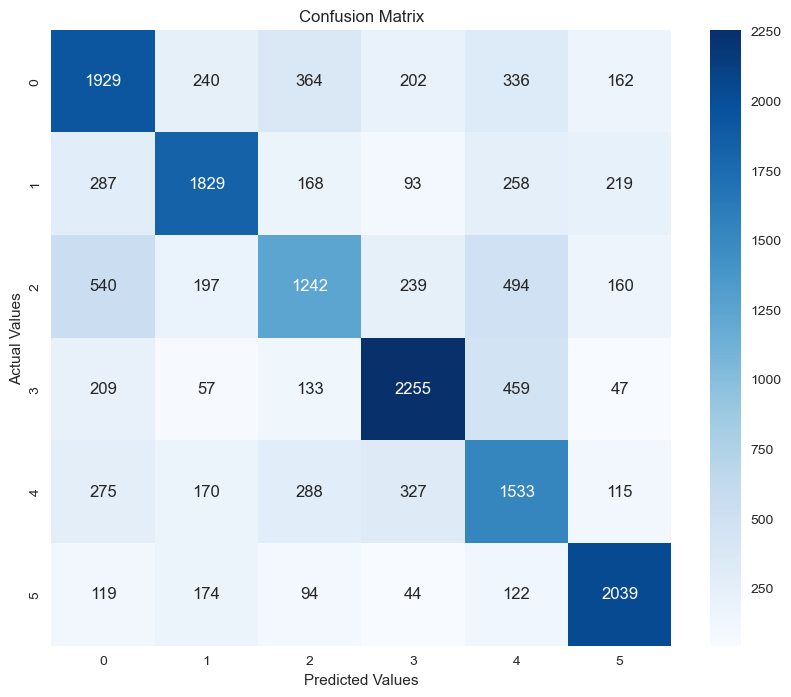

In [76]:
evaluate(svm,x_test,y_test)


Accuracy:  0.6572133876801194 

Model MSE:  2.185200068890292
Model MAE:  0.7654859636029623
              precision    recall  f1-score   support

           0       0.64      0.56      0.59      3233
           1       0.81      0.76      0.78      2854
           2       0.65      0.37      0.47      2872
           3       0.68      0.72      0.70      3160
           4       0.46      0.68      0.55      2708
           5       0.77      0.90      0.83      2592

    accuracy                           0.66     17419
   macro avg       0.67      0.66      0.65     17419
weighted avg       0.67      0.66      0.65     17419

[0.3325  0.52    0.11125 0.      0.02625 0.01   ]
{'sad': 0.3325, 'angry': 0.52, 'fear': 0.11125, 'happy': 0.0, 'neutral': 0.02625, 'disgust': 0.01}


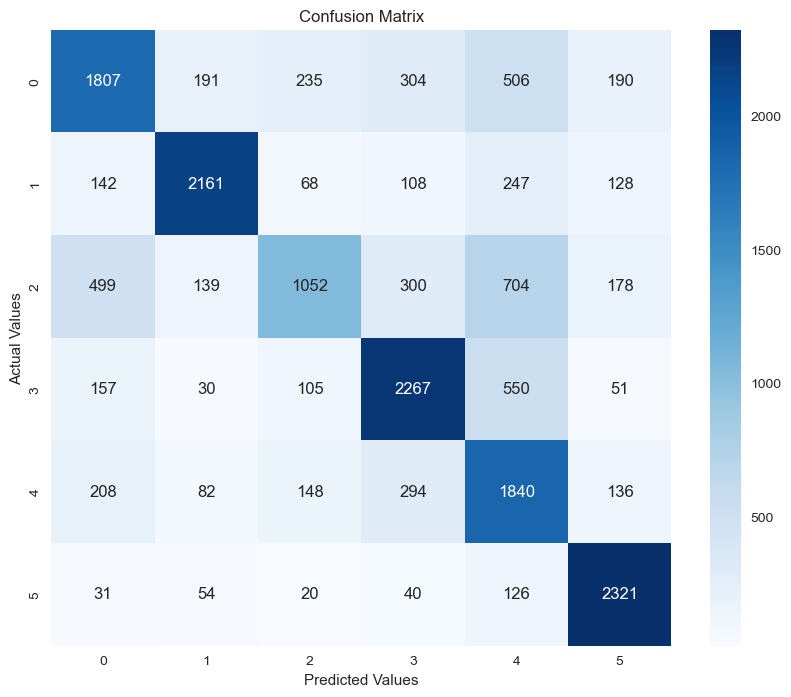

In [78]:
evaluate(ran,x_test,y_test)